In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel

# Data processing

In [3]:
!ls

README.md      analysis.ipynb archive        chatbot.py


In [4]:
# load the datasets
train_df = pd.read_csv('archive/train.txt', names=['text', 'emotion'], sep=';')
val_df = pd.read_csv('archive/val.txt', names=['text', 'emotion'], sep=';')
test_df = pd.read_csv('archive/test.txt', names=['text', 'emotion'], sep=';')

In [5]:
# choosing the train dataset as it has the most rows to study on
train_df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
train_df.shape

(16000, 2)

In [7]:
pd.unique(train_df["emotion"])

# unique emotions
# ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

# Analysis

## Unique emotions

In [8]:
train_df['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

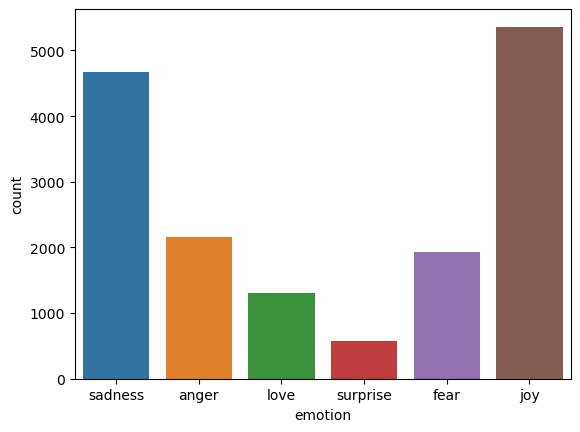

In [9]:
sns.countplot(data=train_df, x="emotion")

# shows repartition of unique values throughout the dataset rows

We see that some emotions are much more present in the dataset than others, there are way less lines of surprise compared to joy or sadness

## Length of text

In [10]:
train_df['len_text'] = train_df['text'].apply(len)
lengths = train_df['len_text'].describe()
lengths

count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: len_text, dtype: float64

We notice imbalance in the texts lengths, even though the longest sentence is 300 characters long, 75% of the values are below 130 characters

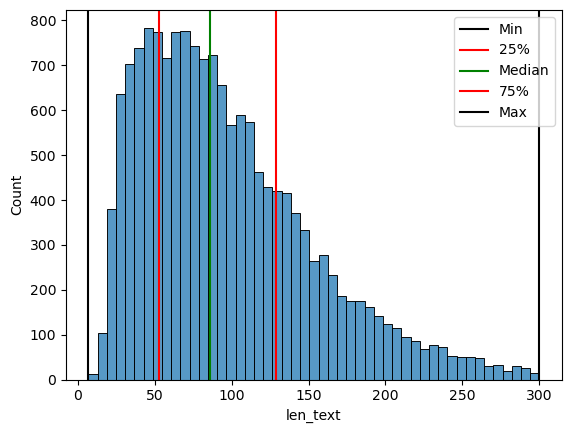

In [34]:
sns.histplot(data=train_df, x='len_text')

plt.axvline(lengths['min'], color='black', linestyle='-', label='Min')
plt.axvline(lengths['25%'], color='red', linestyle='-', label='25%')
plt.axvline(lengths['50%'], color='green', linestyle='-', label='Median')
plt.axvline(lengths['75%'], color='red', linestyle='-', label='75%')
plt.axvline(lengths['max'], color='black', linestyle='-', label='Max')
plt.legend()